In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy
import pandas as pd
import os
import re

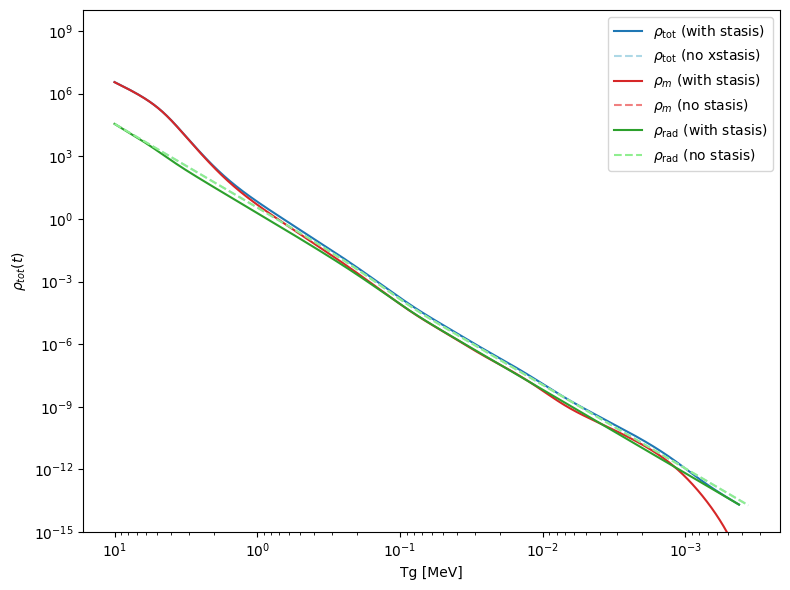

In [2]:
t1, Tg1, rho_tot1, rho_rad1, rho_dm1, Omega_m1, Omega_rad1= \
    np.loadtxt("PRyMrates/thermo/stasis_abundances.txt", unpack=True, skiprows=1)

t2, Tg2, rho_tot2, rho_rad2, rho_m2, _, rho_m_check2, Omega_m2, Omega_rad2, Omega_m_check2 = \
    np.loadtxt("PRyMrates/thermo/abundances.txt", unpack=True, skiprows=1)


# mask1 = (Tg1 <= 9) & (Tg1 >= 6)
# mask2 = (Tg2 <= 8) & (Tg2 >= 6)

# ymin = min(rho_tot1[mask1].min(), rho_tot2[mask2].min())
# ymax = max(rho_tot1[mask1].max(), rho_tot2[mask2].max())

# # print(ymin,ymax)
# print(rho_tot1[0] - rho_tot2[0])
# print(rho_rad1 - rho_rad2)

# print(rho_tot2[0])

# np.set_printoptions(threshold=np.inf)

# print(rho_dm1)
# print(t1)
# print(t2)
#print(Tg1)
#print(Tg2)
#print(rho_tot1)

# pick base and light colors for each quantity
colors = {
    'tot': 'tab:blue',
    'm':   'tab:red',
    'rad': 'tab:green'
}
light = {
    'tot': 'lightblue',
    'm':   'lightcoral',
    'rad': 'lightgreen'
}

fig, ax = plt.subplots(figsize=(8,6))

# total energy density
ax.plot(Tg1, rho_tot1,color=colors['tot'],label=r'$\rho_{\rm tot}$ (with stasis)')
ax.plot(Tg2, rho_tot2,linestyle='--',color=light['tot'],label=r'$\rho_{\rm tot}$ (no xstasis)')

# matter energy density
ax.plot(Tg1, rho_dm1,color=colors['m'],label=r'$\rho_{m}$ (with stasis)')
ax.plot(Tg2, rho_m2,linestyle='--',color=light['m'],label=r'$\rho_{m}$ (no stasis)')

# radiation energy density
ax.plot(Tg1, rho_rad1,color=colors['rad'],label=r'$\rho_{\rm rad}$ (with stasis)')
ax.plot(Tg2, rho_rad2,linestyle='--',color=light['rad'],label=r'$\rho_{\rm rad}$ (no stasis)')

# highlight the stasis window
# ax.axvspan(2, 8, color='gray', alpha=0.2, label='stasis_window')

# ax.set_xlim(6, 9)
# ax.set_ylim(ymin*100, ymax*1.5)   # add a little margin
ax.set_ylim(1e-15, 1e10)
# ax.set_xlim(1e-4,1e1)


ax.set_xlabel("Tg [MeV]")
ax.set_ylabel(r"$\rho_{tot}(t)$")
ax.set_xscale('log')
ax.set_yscale('log')
ax.invert_xaxis()

# ax.set_aspect("equal", adjustable="box")

# ax.legend(title=r"$\Omega_M = 0.001$")
ax.legend()
plt.tight_layout()
plt.show()

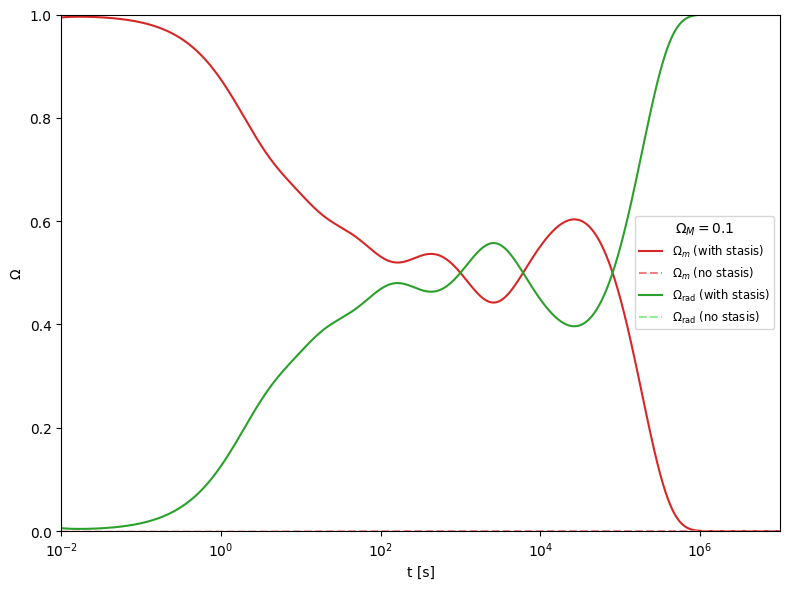

In [17]:
# load your data
t1, Tg1, rho_tot1, rho_rad1, rho_dm1, Omega_m1, Omega_rad1= \
    np.loadtxt("PRyMrates/thermo/stasis_abundances.txt", unpack=True, skiprows=1)

t2, Tg2, rho_tot2, rho_rad2, rho_m2, _, rho_m_check2, Omega_m2, Omega_rad2, Omega_m_check2 = \
    np.loadtxt("PRyMrates/thermo/abundances.txt", unpack=True, skiprows=1)

# same color styling as before
colors = {
    'tot': 'tab:blue',
    'm':   'tab:red',
    'rad': 'tab:green'
}
light = {
    'tot': 'lightblue',
    'm':   'lightcoral',
    'rad': 'lightgreen'
}

fig, ax = plt.subplots(figsize=(8,6))

# # Omega_m with bold solid + light dashed
# ax.plot(Tg1, Omega_m1,
#         color=colors['m'],
#         label=r'$\Omega_m$ (with stasis)')
# ax.plot(Tg2, Omega_m2,
#         linestyle='--',
#         color=light['m'],
#         label=r'$\Omega_m$ (no stasis)')

# # Omega_rad with bold solid + light dashed
# ax.plot(Tg1, Omega_rad1,
#         color=colors['rad'],
#         label=r'$\Omega_{\rm rad}$ (with stasis)')
# ax.plot(Tg2, Omega_rad2,
#         linestyle='--',
#         color=light['rad'],
#         label=r'$\Omega_{\rm rad}$ (no stasis)')

# Omega_m with bold solid + light dashed
ax.plot(t1, Omega_m1,
        color=colors['m'],
        label=r'$\Omega_m$ (with stasis)')
ax.plot(t2, Omega_m2,
        linestyle='--',
        color=light['m'],
        label=r'$\Omega_m$ (no stasis)')

# Omega_rad with bold solid + light dashed
ax.plot(t1, Omega_rad1,
        color=colors['rad'],
        label=r'$\Omega_{\rm rad}$ (with stasis)')
ax.plot(t2, Omega_rad2,
        linestyle='--',
        color=light['rad'],
        label=r'$\Omega_{\rm rad}$ (no stasis)')

# highlight the stasis window
# ax.axvspan(2, 8, color='gray', alpha=0.2, label='stasis window')

# axis settings
# ax.set_xlabel("Tg [MeV]")
ax.set_xlabel("t [s]")
ax.set_ylabel(r"$\Omega$")
ax.set_xscale('log')
# ax.invert_xaxis()            # Tg descending
ax.set_ylim(-0.1, 1.1)            # Ω runs from 0 to 1
ax.set_xlim(min(t2),max(t2))
ax.set_xlim(1e-2,1e7)
ax.set_ylim(0,1)
# legend and layout
ax.legend(loc='best', title=r"$\Omega_M = 0.1$", fontsize='small')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
plt.semilogx(t, Omega_M, label=r'$\Omega_M$', color='firebrick')
plt.semilogx(t, Omega_g, label=r'$\Omega_\gamma$', color='royalblue')
plt.xlabel(r'time  $t$  (s)')
plt.ylabel(r'abundance $\Omega$')
#plt.title('Matter–Radiation Stasis  Abundances')
plt.ylim(1e-4, 1.05)

# plt.xlim(1e-10, 1e3)
plt.xlim(min(t),max(t))
plt.xlim(1e-2,1e7)
plt.ylim(0,1)
#plt.axvline(x=1e0, color='black', linestyle='--', label='t = 1 sec')

plt.legend()
plt.tight_layout()
plt.show()

In [9]:
Omega_m1[-1]

0.003074497